In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Object creation

See the [Data structure intro section](https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dsintro).


Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

We can create `Series` from `numpy.array`.

In [3]:
s1 = pd.Series(np.array([1,2,3,4,5]))
s1

0    1
1    2
2    3
3    4
4    5
dtype: int64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a `datetime` index and labeled columns:

In [4]:
dates = pd.date_range('20180101', periods=6)
dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

A         B         C         D
2018-01-01  0.689197 -0.748328  0.336841  0.302999
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290
2018-01-04 -2.081735  0.503221 -0.748308  0.298659
2018-01-05 -0.189942 -0.059702  0.578785 -0.649389
2018-01-06  1.121153  1.116452 -0.719793 -1.199080

Creating `DataFrame` from python `dict`.

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })
df2

A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo

In [7]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

### Viewing Data

In [8]:
df.head()

A         B         C         D
2018-01-01  0.689197 -0.748328  0.336841  0.302999
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290
2018-01-04 -2.081735  0.503221 -0.748308  0.298659
2018-01-05 -0.189942 -0.059702  0.578785 -0.649389

Display the `index`, columns, and the underlying `NumPy` data:

In [9]:
df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.68919679, -0.74832834,  0.33684064,  0.3029987 ],
       [ 0.01173233,  1.80050913, -0.73033801, -0.59073464],
       [-0.01327916,  1.47011302, -0.0476773 , -0.40828974],
       [-2.08173485,  0.50322085, -0.7483085 ,  0.2986594 ],
       [-0.18994195, -0.05970245,  0.57878542, -0.64938875],
       [ 1.12115282,  1.1164519 , -0.71979345, -1.19908042]])

Some basic stats.

In [12]:
df.describe()

A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean  -0.077146  0.680377 -0.221749 -0.374306
std    1.101479  0.968384  0.594501  0.585755
min   -2.081735 -0.748328 -0.748308 -1.199080
25%   -0.145776  0.081028 -0.727702 -0.634725
50%   -0.000773  0.809836 -0.383735 -0.499512
75%    0.519831  1.381698  0.240711  0.121922
max    1.121153  1.800509  0.578785  0.302999

In [13]:
df.T

2018-01-01  2018-01-02  2018-01-03  2018-01-04  2018-01-05  2018-01-06
A    0.689197    0.011732   -0.013279   -2.081735   -0.189942    1.121153
B   -0.748328    1.800509    1.470113    0.503221   -0.059702    1.116452
C    0.336841   -0.730338   -0.047677   -0.748308    0.578785   -0.719793
D    0.302999   -0.590735   -0.408290    0.298659   -0.649389   -1.199080

In [14]:
df.sort_index(axis=1, ascending=False)

D         C         B         A
2018-01-01  0.302999  0.336841 -0.748328  0.689197
2018-01-02 -0.590735 -0.730338  1.800509  0.011732
2018-01-03 -0.408290 -0.047677  1.470113 -0.013279
2018-01-04  0.298659 -0.748308  0.503221 -2.081735
2018-01-05 -0.649389  0.578785 -0.059702 -0.189942
2018-01-06 -1.199080 -0.719793  1.116452  1.121153

In [15]:
df.sort_values(by='B')

A         B         C         D
2018-01-01  0.689197 -0.748328  0.336841  0.302999
2018-01-05 -0.189942 -0.059702  0.578785 -0.649389
2018-01-04 -2.081735  0.503221 -0.748308  0.298659
2018-01-06  1.121153  1.116452 -0.719793 -1.199080
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290
2018-01-02  0.011732  1.800509 -0.730338 -0.590735

### Selection by label

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced).

In [16]:
df['A']

2018-01-01    0.689197
2018-01-02    0.011732
2018-01-03   -0.013279
2018-01-04   -2.081735
2018-01-05   -0.189942
2018-01-06    1.121153
Freq: D, Name: A, dtype: float64

In [17]:
df[0:3]

A         B         C         D
2018-01-01  0.689197 -0.748328  0.336841  0.302999
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290

In [18]:
df['20180102':'20180104']

A         B         C         D
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290
2018-01-04 -2.081735  0.503221 -0.748308  0.298659

Selection by label:

In [19]:
df.loc[dates[0]]

A    0.689197
B   -0.748328
C    0.336841
D    0.302999
Name: 2018-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [20]:
df.loc[:,['A','B']]

A         B
2018-01-01  0.689197 -0.748328
2018-01-02  0.011732  1.800509
2018-01-03 -0.013279  1.470113
2018-01-04 -2.081735  0.503221
2018-01-05 -0.189942 -0.059702
2018-01-06  1.121153  1.116452

Showing label slicing, both endpoints are **included**:

In [21]:
df.loc['20180102':'20180104',['A','B']]

A         B
2018-01-02  0.011732  1.800509
2018-01-03 -0.013279  1.470113
2018-01-04 -2.081735  0.503221

Reduction in the dimensions of the returned object:

In [22]:
df.loc['20180102',['A','B']]

A    0.011732
B    1.800509
Name: 2018-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [23]:
df.loc[dates[0],'A']

0.6891967902179298

For getting fast access to a scalar (equivalent to the prior method):

In [24]:
df.at[dates[0],'A']

0.6891967902179298

**Note**

While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, use the optimized pandas data access methods, `.at`, `.iat`, `.loc` and `.iloc`. 

### Selection by position

In [25]:
df.iloc[3]

A   -2.081735
B    0.503221
C   -0.748308
D    0.298659
Name: 2018-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python:

In [26]:
df.iloc[3:5,0:2]

A         B
2018-01-04 -2.081735  0.503221
2018-01-05 -0.189942 -0.059702

By lists of integer position locations, similar to the numpy/python style:

In [27]:
df.iloc[[1,2,4],[0,2]]

A         C
2018-01-02  0.011732 -0.730338
2018-01-03 -0.013279 -0.047677
2018-01-05 -0.189942  0.578785

For slicing rows explicitly:

In [28]:
df.iloc[1:3,:]

A         B         C         D
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290

For slicing columns explicitly:

In [29]:
df.iloc[:,1:3]

B         C
2018-01-01 -0.748328  0.336841
2018-01-02  1.800509 -0.730338
2018-01-03  1.470113 -0.047677
2018-01-04  0.503221 -0.748308
2018-01-05 -0.059702  0.578785
2018-01-06  1.116452 -0.719793

For getting a value explicitly:

In [30]:
df.iloc[1,1]

1.8005091253933956

For getting fast access to a scalar (equivalent to the prior method):

In [31]:
df.iat[1,1]

1.8005091253933956

### Boolean indexing

In [32]:
df[df.A > 0]

A         B         C         D
2018-01-01  0.689197 -0.748328  0.336841  0.302999
2018-01-02  0.011732  1.800509 -0.730338 -0.590735
2018-01-06  1.121153  1.116452 -0.719793 -1.199080

Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

A         B         C         D
2018-01-01  0.689197       NaN  0.336841  0.302999
2018-01-02  0.011732  1.800509       NaN       NaN
2018-01-03       NaN  1.470113       NaN       NaN
2018-01-04       NaN  0.503221       NaN  0.298659
2018-01-05       NaN       NaN  0.578785       NaN
2018-01-06  1.121153  1.116452       NaN       NaN

Using the [isin()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.isin.html#pandas.Series.isin) method for filtering:

In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

A         B         C         D      E
2018-01-01  0.689197 -0.748328  0.336841  0.302999    one
2018-01-02  0.011732  1.800509 -0.730338 -0.590735    one
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290    two
2018-01-04 -2.081735  0.503221 -0.748308  0.298659  three
2018-01-05 -0.189942 -0.059702  0.578785 -0.649389   four
2018-01-06  1.121153  1.116452 -0.719793 -1.199080  three

In [35]:
df2[df2['E'].isin(['two','four'])]

A         B         C         D     E
2018-01-03 -0.013279  1.470113 -0.047677 -0.408290   two
2018-01-05 -0.189942 -0.059702  0.578785 -0.649389  four

### Setting

Setting a new column automatically aligns the data by the indexes.

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20180102', periods=6))
s1

2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
2018-01-06    5
2018-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

Setting values by label:

In [38]:
df.at[dates[0],'A'] = 0

Setting values by position:

In [39]:
df.iat[0,1] = 0

Setting by assigning with a NumPy array:

In [40]:
df.loc[:,'D'] = np.array([5] * len(df))

In [41]:
df

A         B         C    D    F
2018-01-01  0.000000  0.000000  0.336841  5.0  NaN
2018-01-02  0.011732  1.800509 -0.730338  5.0  1.0
2018-01-03 -0.013279  1.470113 -0.047677  5.0  2.0
2018-01-04 -2.081735  0.503221 -0.748308  5.0  3.0
2018-01-05 -0.189942 -0.059702  0.578785  5.0  4.0
2018-01-06  1.121153  1.116452 -0.719793  5.0  5.0

A `where` operation with setting.

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

A         B         C    D    F
2018-01-01  0.000000  0.000000 -0.336841 -5.0  NaN
2018-01-02 -0.011732 -1.800509 -0.730338 -5.0 -1.0
2018-01-03 -0.013279 -1.470113 -0.047677 -5.0 -2.0
2018-01-04 -2.081735 -0.503221 -0.748308 -5.0 -3.0
2018-01-05 -0.189942 -0.059702 -0.578785 -5.0 -4.0
2018-01-06 -1.121153 -1.116452 -0.719793 -5.0 -5.0

### Missing data

pandas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. See the [Missing Data](https://pandas.pydata.org/pandas-docs/stable/missing_data.html#missing-data) section.

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the dat

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

A         B         C    D    F    E
2018-01-01  0.000000  0.000000  0.336841  5.0  NaN  1.0
2018-01-02  0.011732  1.800509 -0.730338  5.0  1.0  1.0
2018-01-03 -0.013279  1.470113 -0.047677  5.0  2.0  NaN
2018-01-04 -2.081735  0.503221 -0.748308  5.0  3.0  NaN

To drop `any` rows that have missing data.

In [44]:
df1.dropna(how='any')

A         B         C    D    F    E
2018-01-02  0.011732  1.800509 -0.730338  5.0  1.0  1.0

Filling missing data

In [45]:
df1.fillna(value=5)

A         B         C    D    F    E
2018-01-01  0.000000  0.000000  0.336841  5.0  5.0  1.0
2018-01-02  0.011732  1.800509 -0.730338  5.0  1.0  1.0
2018-01-03 -0.013279  1.470113 -0.047677  5.0  2.0  5.0
2018-01-04 -2.081735  0.503221 -0.748308  5.0  3.0  5.0

To get the boolean mask where values are `nan`.

In [46]:
pd.isna(df1)

A      B      C      D      F      E
2018-01-01  False  False  False  False   True  False
2018-01-02  False  False  False  False  False  False
2018-01-03  False  False  False  False  False   True
2018-01-04  False  False  False  False  False   True

### Operations

Operations in general exclude missing data.

In [47]:
df.mean()

A   -0.192012
B    0.805099
C   -0.221749
D    5.000000
F    3.000000
dtype: float64

In [48]:
df.mean(1)  # other axis

2018-01-01    1.334210
2018-01-02    1.416381
2018-01-03    1.681831
2018-01-04    1.134636
2018-01-05    1.865828
2018-01-06    2.303562
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need **alignment**. In addition, pandas automatically broadcasts along the specified dimension.

In [49]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2018-01-01    NaN
2018-01-02    NaN
2018-01-03    1.0
2018-01-04    3.0
2018-01-05    5.0
2018-01-06    NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

A         B         C    D    F
2018-01-01       NaN       NaN       NaN  NaN  NaN
2018-01-02       NaN       NaN       NaN  NaN  NaN
2018-01-03 -1.013279  0.470113 -1.047677  4.0  1.0
2018-01-04 -5.081735 -2.496779 -3.748308  2.0  0.0
2018-01-05 -5.189942 -5.059702 -4.421215  0.0 -1.0
2018-01-06       NaN       NaN       NaN  NaN  NaN

Applying functions to the data:

In [51]:
df.apply(np.cumsum)

A         B         C     D     F
2018-01-01  0.000000  0.000000  0.336841   5.0   NaN
2018-01-02  0.011732  1.800509 -0.393497  10.0   1.0
2018-01-03 -0.001547  3.270622 -0.441175  15.0   3.0
2018-01-04 -2.083282  3.773843 -1.189483  20.0   6.0
2018-01-05 -2.273224  3.714141 -0.610698  25.0  10.0
2018-01-06 -1.152071  4.830592 -1.330491  30.0  15.0

In [52]:
df.apply(lambda x: x.max() - x.min())

A    3.202888
B    1.860212
C    1.327094
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [53]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    0
1    6
2    4
3    0
4    2
5    5
6    1
7    0
8    2
9    1
dtype: int64

In [54]:
s.value_counts()

0    3
2    2
1    2
6    1
4    1
5    1
Name: count, dtype: int64

### String methods

`Series` is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in `str` generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them).

In [55]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s

0       A
1       B
2       C
3    Aaba
4    Baca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [56]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

### Merge

pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

See the [Merging](https://pandas.pydata.org/pandas-docs/stable/merging.html#merging) section.

#### Concat

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

0         1         2         3
0  1.196264 -0.307483  1.087363 -0.063503
1 -0.553211 -0.744502 -0.109022 -0.271307
2 -3.251581  1.197394  1.508955  1.039690
3  1.536642  0.626617 -1.684411 -1.331959
4  0.678949 -0.959102  0.707512 -0.846799
5 -1.748012 -0.868352 -1.068672  0.518735
6  0.933116  1.235156 -0.356329 -0.616035
7  0.442595  0.995129 -0.609787  0.018593
8  0.673083 -1.811854 -0.780173  2.672571
9 -1.125609  1.173348 -0.377945 -0.285722

In [58]:
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

0         1         2         3
0  1.196264 -0.307483  1.087363 -0.063503
1 -0.553211 -0.744502 -0.109022 -0.271307
2 -3.251581  1.197394  1.508955  1.039690

In [59]:
pd.concat(pieces)

0         1         2         3
0  1.196264 -0.307483  1.087363 -0.063503
1 -0.553211 -0.744502 -0.109022 -0.271307
2 -3.251581  1.197394  1.508955  1.039690
3  1.536642  0.626617 -1.684411 -1.331959
4  0.678949 -0.959102  0.707512 -0.846799
5 -1.748012 -0.868352 -1.068672  0.518735
6  0.933116  1.235156 -0.356329 -0.616035
7  0.442595  0.995129 -0.609787  0.018593
8  0.673083 -1.811854 -0.780173  2.672571
9 -1.125609  1.173348 -0.377945 -0.285722

#### Join

In [60]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

key  lval
0  foo     1
1  foo     2

In [61]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

key  rval
0  foo     4
1  foo     5

In [62]:
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5

In [63]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

key  lval  rval
0  foo     1     4
1  bar     2     5

### Grouping
By “group by” we are referring to a process involving one or more of the following steps:

  * Splitting the data into groups based on some criteria
  * Applying a function to each group independently
  * Combining the results into a data structure

Read the [docs](https://pandas.pydata.org/pandas-docs/stable/groupby.html#groupby).

In [64]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
                   'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

A      B         C         D
0  foo    one -1.784887  0.832337
1  bar    one  0.781068 -1.339679
2  foo    two  0.078568  0.707609
3  bar  three -0.688408  0.432818
4  foo    two -1.895856  1.681678
5  bar    two  0.460244 -1.310075
6  foo    one -0.800081 -0.253487
7  foo  three -0.869920 -1.378880

In [65]:
df.groupby('A').sum()

B         C         D
A                                         
bar        onethreetwo  0.552903 -2.216936
foo  onetwotwoonethree -5.272176  1.589256

In [66]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.781068 -1.339679
    three -0.688408  0.432818
    two    0.460244 -1.310075
foo one   -2.584968  0.578849
    three -0.869920 -1.378880
    two   -1.817288  2.389287

### Reshaping

Read the docs [here](https://pandas.pydata.org/pandas-docs/stable/advanced.html#advanced-hierarchical) and [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-stacking)

#### Stack


In [67]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [68]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [69]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])


In [70]:
df2 = df[:4]

In [71]:
df2

A         B
first second                    
bar   one     1.202213 -0.969292
      two     1.398283 -0.909918
baz   one     0.149835 -1.197965
      two     0.262480  0.077155

The [stack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns.

In [72]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.202213
               B   -0.969292
       two     A    1.398283
               B   -0.909918
baz    one     A    0.149835
               B   -1.197965
       two     A    0.262480
               B    0.077155
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of `stack()` is [unstack()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the last level:

In [73]:
stacked.unstack()

A         B
first second                    
bar   one     1.202213 -0.969292
      two     1.398283 -0.909918
baz   one     0.149835 -1.197965
      two     0.262480  0.077155

In [74]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.202213  1.398283
      B -0.969292 -0.909918
baz   A  0.149835  0.262480
      B -1.197965  0.077155

In [75]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.202213  0.149835
       B -0.969292 -1.197965
two    A  1.398283  0.262480
       B -0.909918  0.077155

### Time Series

Read the [docs](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries)

In [76]:
rng = pd.date_range('1/1/2018', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_27636/3177683689.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2018', periods=100, freq='S')


2018-01-01    26900
Freq: 5min, dtype: int64

In [77]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.471622
2012-03-07   -1.126055
2012-03-08   -1.772563
2012-03-09    0.478307
2012-03-10    0.099097
Freq: D, dtype: float64

In [78]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

/var/folders/b3/cjvms6c10k77tgv6k_rw3jbh0000gn/T/ipykernel_27636/3446765465.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('1/1/2012', periods=5, freq='M')


2012-01-31    0.038780
2012-02-29   -0.192911
2012-03-31    1.175681
2012-04-30    0.970227
2012-05-31    0.545653
Freq: ME, dtype: float64

In [79]:
ps = ts.to_period()
ps

2012-01    0.038780
2012-02   -0.192911
2012-03    1.175681
2012-04    0.970227
2012-05    0.545653
Freq: M, dtype: float64

In [80]:
ps.to_timestamp()

2012-01-01    0.038780
2012-02-01   -0.192911
2012-03-01    1.175681
2012-04-01    0.970227
2012-05-01    0.545653
Freq: MS, dtype: float64

<Axes: >

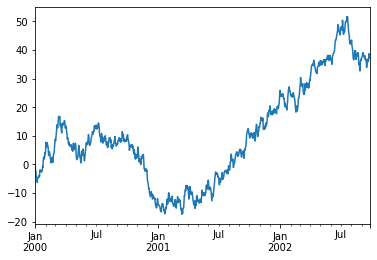

In [81]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

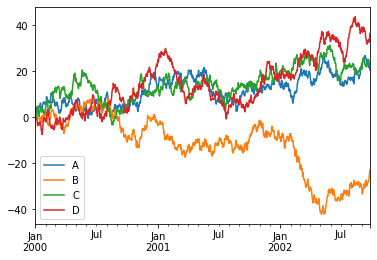

In [82]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

### Writing/reading to/from csv

In [83]:
df.to_csv('foo.csv')

In [84]:
pd.read_csv('foo.csv')

Unnamed: 0          A          B          C          D
0    2000-01-01   1.948741   1.330376  -0.106148  -1.425121
1    2000-01-02   1.142802   0.684310   0.682617  -0.570491
2    2000-01-03   2.110364   1.004728   0.605664  -0.075320
3    2000-01-04   4.387585   0.731106   0.245145  -0.955636
4    2000-01-05   4.028810   0.866706   2.099975  -0.306223
..          ...        ...        ...        ...        ...
995  2002-09-22  21.901936 -28.037157  24.823378  33.246643
996  2002-09-23  22.032930 -26.960648  24.149946  32.554474
997  2002-09-24  21.331010 -24.985795  23.597978  33.058872
998  2002-09-25  21.596796 -23.555550  22.125744  35.198855
999  2002-09-26  20.331563 -22.874957  22.867146  36.463493

[1000 rows x 5 columns]